In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [4]:
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


In [5]:
nl = df['BULLET_POINTS'].iloc[:50]

In [6]:
tt = df['TITLE'].iloc[:50]
tt.unique()

array(['ArtzFolio Tulip Flowers Blackout Curtain for Door, Window & Room | Eyelets & Tie Back | Canvas Fabric | Width 4.5feet (54inch) Height 5 feet (60 inch); Set of 2 PCS',
       "Marks & Spencer Girls' Pyjama Sets T86_2561C_Navy Mix_9-10Y",
       'PRIKNIK Horn Red Electric Air Horn Compressor Interior Dual Tone Trumpet Loud Compatible with SX4',
       "ALISHAH Women's Cotton Ankle Length Leggings Combo of 2, Plus 12 Colors_L",
       'The United Empire Loyalists: A Chronicle of the Great Migration',
       'HINS Metal Bucket Shape Plant Pot for Indoor & Outdoor Gardening (Red, Medium) Plant Stands for Indoor Balcony I Plant Bench I Plant Stands I Pot Stand Single I Potted Plant Stand I Big Pots I Metal',
       'Ungifted: My Life and Journey',
       'Delavala Self Adhesive Kitchen Backsplash Wallpaper, Oil Proof Aluminum Foil Kitchen Sticker (Sliver 5(Mtr))',
       "PUMA Cali Sport Clean Women's Sneakers White Leather (37540701)",
       'Hexwell Essential oil for Home Fragranc

In [7]:
ds = df['DESCRIPTION'].iloc[:50]
ds

0                                                   NaN
1                                                   NaN
2     Specifications: Color: Red, Material: Aluminiu...
3     AISHAH Women's Lycra Cotton Ankel Leggings. Br...
4                                                   NaN
5     HINS Brings you the most Elegant Looking Pot w...
6                                                   NaN
7     <p><strong>Aluminum Foil Stickers-good kitchen...
8                                                   NaN
9     Transform your home, workplace or hotel room i...
10    3NH Glasses Goggles Anti Fog Antis Windproof A...
11                                                  NaN
12                                                  NaN
13                                                  NaN
14    Segovia bottle consists of stainless steel whi...
15                                                  NaN
16                                                  NaN
17                                              

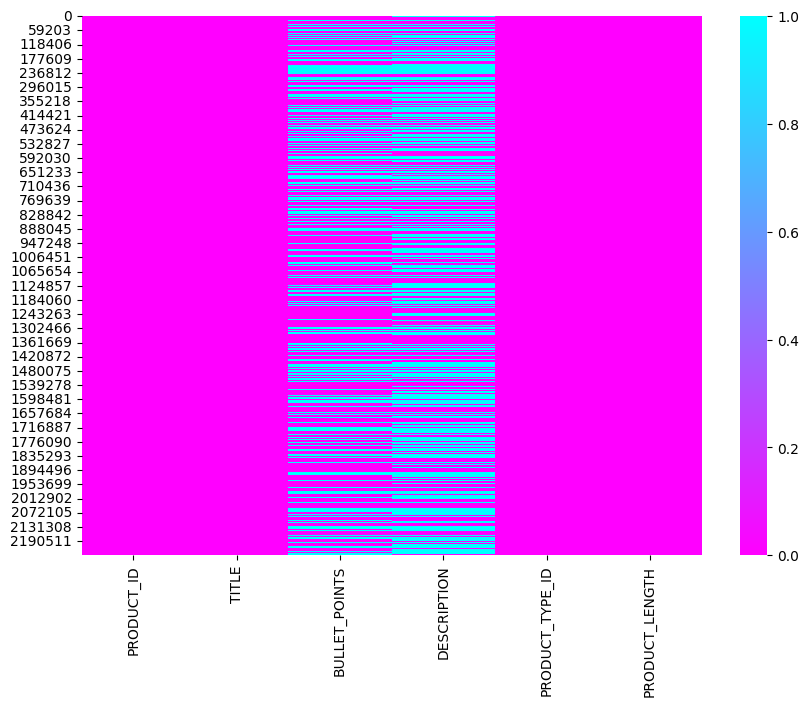

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()
df.isnull().sum()

In [9]:
df.dtypes

PRODUCT_ID           int64
TITLE               object
BULLET_POINTS       object
DESCRIPTION         object
PRODUCT_TYPE_ID      int64
PRODUCT_LENGTH     float64
dtype: object

In [10]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91973\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91973\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# # Load example data
# cd = pd.DataFrame({
#     'product_title': ['Product A with HTML tags', 'Product B with HTML tags'],
#     'description': ['Product A description with HTML tags and emojis 😊.',
#                     'Product B description with HTML tags and emojis 😊.'],
#     'length': [10, 15]
# })
# # df['text'] = df['text'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

# # # Tokenize the text
# # df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))

# # # Remove stop words
# # df['filtered_tokens'] = df['tokens'].apply(lambda x: [token for token in x if token.lower() not in stop_words])
# # Define a function to preprocess text
# def preprocess_text(text):
#     stop_words = ['a', 'an', 'and', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'her', 'his', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'were', 'with']
#     # Remove HTML tags
#     text = re.sub(r'<[^>]+>', '', text)
    
#     # Remove special characters and punctuation
#     text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
#     # Lowercase text
#     text = text.lower()
    
#     # Tokenize text
#     words = word_tokenize(text)
    
#     # Remove stop words
#     # stop_words = set(stopwords.words('english'))
#     # words = [word for word in words if word not in stop_words]
#     # Remove stop words
#     # words = [word for word in words if word.lower() not in stop_words]
#     stop_words = set(stopwords.words('english') + stop_words)
#     text = text.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
#     # Stem words
#     stemmer = PorterStemmer()
#     words = [stemmer.stem(word) for word in words]
#     # text = re.sub(words, text)
    
#     # Convert text to numerical representation
#     tfidf = TfidfVectorizer(min_df=1)
#     text = tfidf.fit_transform(words).toarray()
    
#     return text

# # Apply the preprocess_text function to the product_title and description columns
# cd['product_title_processed'] = cd['product_title'].apply(preprocess_text)
# cd['description_processed'] = cd['description'].apply(preprocess_text)

# # Print the preprocessed dataframe
# print(cd)

In [12]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
#     df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    # df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    # df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
     # Remove HTML tags
    df[df_column_name] = df[df_column_name].str.replace(r'<[^>]+>', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [13]:
df=df.iloc[:,:]

In [14]:
df.loc[df['DESCRIPTION'].isnull(), 'DESCRIPTION'] = 'DESCRIPTION NOT AVAILABLE'

In [15]:
# df['TITLE'].fillna('TITLE NOT AVAILABLE',inplace = True)
df.loc[df['TITLE'].isnull(), 'TITLE'] = 'TITLE NOT AVAILABLE'

In [16]:
# df['BULLET_POINTS'].fillna('No Bullet points',inplace = True)
df.loc[df['BULLET_POINTS'].isnull(), 'BULLET_POINTS'] = 'BULLET POINTS NOT AVAILABLE'

In [17]:
df['DESCRIPTION']

0                                  DESCRIPTION NOT AVAILABLE
1                                  DESCRIPTION NOT AVAILABLE
2          Specifications: Color: Red, Material: Aluminiu...
3          AISHAH Women's Lycra Cotton Ankel Leggings. Br...
4                                  DESCRIPTION NOT AVAILABLE
                                 ...                        
2249693                            DESCRIPTION NOT AVAILABLE
2249694    <p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...
2249695    Wall Clocks Are Very Attractive In Looks And E...
2249696                            DESCRIPTION NOT AVAILABLE
2249697    Skyjacker C7360SP Component Box For PN[C7360PK...
Name: DESCRIPTION, Length: 2249698, dtype: object

In [18]:
#Calling the class
clean_text(df, 'DESCRIPTION')
df['DESCRIPTION'].head(3)

C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')
C:\Users\91973\App

0                                description available
1                                description available
2    specifications color red material aluminium vo...
Name: DESCRIPTION, dtype: object

In [19]:
df.isnull().sum()

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64

In [20]:
# preprocessed_data = pd.DataFrame()

# # preprocessed_data['title_processed'] = df['TITLE'].apply(preprocess_text)
# df['description_processed'] = df['DESCRIPTION'].apply(preprocess_text)

# # Print the preprocessed dataframe
# print(df.head())


In [21]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['DESCRIPTION'] = df['DESCRIPTION'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,"[description, available]",1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...","[description, available]",2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","[specifications, color, red, material, alumini...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,"[aishah, women, lycra, cotton, ankel, leggings...",2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,BULLET POINTS NOT AVAILABLE,"[description, available]",6112,598.424000


In [22]:
clean_text(df, 'TITLE')
df['TITLE'].head(10)

C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')
C:\Users\91973\App

0    artzfolio tulip flowers blackout curtain door ...
1    marks spencer girls pyjama sets t86_2561c_navy...
2    priknik horn red electric air horn compressor ...
3    alishah women cotton ankle length leggings com...
4    united empire loyalists chronicle great migration
5    hins metal bucket shape plant pot indoor outdo...
6                                ungifted life journey
7    delavala self adhesive kitchen backsplash wall...
8    puma cali sport clean women sneakers white lea...
9    hexwell essential oil home fragrance oil aroma...
Name: TITLE, dtype: object

In [23]:
df['TITLE'] = df['TITLE'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['TITLE'].head(10)

0    [artzfolio, tulip, flowers, blackout, curtain,...
1    [marks, spencer, girls, pyjama, sets, t86_2561...
2    [priknik, horn, red, electric, air, horn, comp...
3    [alishah, women, cotton, ankle, length, leggin...
4    [united, empire, loyalists, chronicle, great, ...
5    [hins, metal, bucket, shape, plant, pot, indoo...
6                            [ungifted, life, journey]
7    [delavala, self, adhesive, kitchen, backsplash...
8    [puma, cali, sport, clean, women, sneakers, wh...
9    [hexwell, essential, oil, home, fragrance, oil...
Name: TITLE, dtype: object

In [24]:
clean_text(df, 'BULLET_POINTS')
df['BULLET_POINTS'].head(10)

C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')
C:\Users\91973\AppData\Local\Temp\ipykernel_16340\2520637503.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')
C:\Users\91973\App

0    luxurious appealing beautiful custom made curt...
1    harry potter hedwig pyjamas 6 16 yrs 100 cotto...
2    loud dual tone trumpet horn compatible sx4 ele...
3    made 95 cotton 5 lycra gives ways stretchable ...
4                              bullet points available
5    simple elegant great displaying indoor plants ...
6                              bullet points available
7    high quality pvc material kitchen aluminum foi...
8    style name cali sport clean women sneakers upp...
9    100 pure natural essential oil fragrance oil b...
Name: BULLET_POINTS, dtype: object

In [25]:
df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['BULLET_POINTS'].head(10)

KeyboardInterrupt: 